In [11]:
# Importing the dataset 
import pandas as pd 
Listings = pd.read_csv("Listings.csv", encoding="ISO-8859-1", low_memory=False )
Listings.head(100)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,39661325,Cosy apartment in a courtyard in Paris,10573900,2013-12-11,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
96,40138837,Charming apartment in Montmartre,70226434,2016-05-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
97,40414327,"Modern 1 bedroom flat, Calm & Cosy",29214798,2015-03-12,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
98,40479799,Parisian Appartement near PÃÂ¨re Lachaise,13803334,2014-04-02,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [7]:
# Checking for dataypes and null values 
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [12]:
# Cast any date columns as a datetime format
# Convert 'host_since' column to datetime format
Listings['host_since'] = pd.to_datetime(Listings['host_since'], errors='coerce')

# Check the first few rows to verify
print(Listings[['host_since']].head())


  host_since
0 2011-12-03
1 2013-11-29
2 2014-07-31
3 2013-12-17
4 2014-12-14


In [13]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [16]:
#Filtering the data down to rows where the city is Paris, and keep specific columns
# Create a new DataFrame with specific columns and rows where 'city' is Paris
Listings_Paris = Listings[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']].copy()

# Filter rows where 'city' is Paris (case-insensitive match)
Listings_Paris = Listings_Paris[Listings_Paris['city'].str.lower() == 'paris']

# Check the first few rows of Listings_Paris to verify
Listings_Paris


,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [17]:
# Finding the minimum, maximum, and average for each numeric field
Listings_Paris.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [18]:
# Checking for missing values 
Listings_Paris.info()


<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [20]:
# Group by 'neighbourhood', calculate the mean of 'price', and sort in ascending order
paris_listings_neighbourhood = Listings_Paris.groupby('neighbourhood')['price'].mean().reset_index()

# Sort the resulting DataFrame by 'price' in ascending order
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values(by='price', ascending=True)
paris_listings_neighbourhood

,neighbourhood,price
10,Menilmontant,74.942257
2,Buttes-Chaumont,82.690182
3,Buttes-Montmartre,87.209479
17,Reuilly,89.058402
16,Popincourt,90.559459
6,Gobelins,98.110184
11,Observatoire,101.866801
0,Batignolles-Monceau,102.612702
5,Enclos-St-Laurent,102.967156
19,Vaugirard,106.831330


In [21]:
# Group by 'accommodates', calculate the mean of 'price', and sort in ascending order
paris_listings_accomodations = Listings_Paris.groupby('accommodates')['price'].mean().reset_index()

# Sort the resulting DataFrame by 'price' in ascending order
paris_listings_accomodations = paris_listings_accomodations.sort_values(by='price', ascending=True)
paris_listings_accomodations 


,accommodates,price
0,0,0.000000
1,1,64.847055
2,2,84.070550
3,3,98.231924
4,4,125.990255
5,5,165.160757
6,6,217.147059
7,7,261.065957
8,8,324.770308
9,9,381.900000


In [22]:
# Extract the year from the 'host_since' column
Listings_Paris['host_since_year'] = Listings_Paris['host_since'].dt.year

# Group by 'host_since_year', calculate the average price and count of rows
paris_listings_over_time = Listings_Paris.groupby('host_since_year').agg(
    average_price=('price', 'mean'),
    new_hosts_count=('host_since', 'size')
).reset_index()

# Check the result
paris_listings_over_time


,host_since_year,average_price,new_hosts_count
0,2008.0,77.750000,4
1,2009.0,159.641509,106
2,2010.0,125.031250,416
3,2011.0,124.828230,1339
4,2012.0,111.578615,4592
5,2013.0,107.096414,8142
6,2014.0,100.253800,10922
7,2015.0,103.646250,12147
8,2016.0,114.159847,8871
9,2017.0,108.658888,4585


<Figure size 1000x800 with 0 Axes>

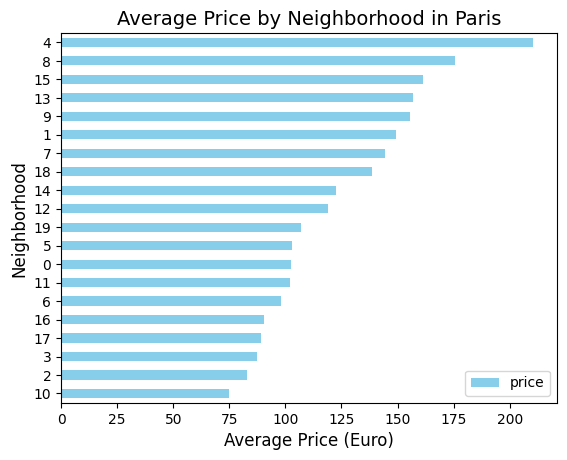

In [26]:
import matplotlib.pyplot as plt

# Plot a horizontal bar chart
plt.figure(figsize=(10, 8))
ax = paris_listings_neighbourhood.plot(kind='barh', color='skyblue')

# Add a title and axis labels
plt.title('Average Price by Neighborhood in Paris', fontsize=14)
plt.xlabel('Average Price (Euro)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

# Ensure that neighborhood names appear as labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Keeps labels horizontal, adjust if needed

# Show the plot
plt.show()

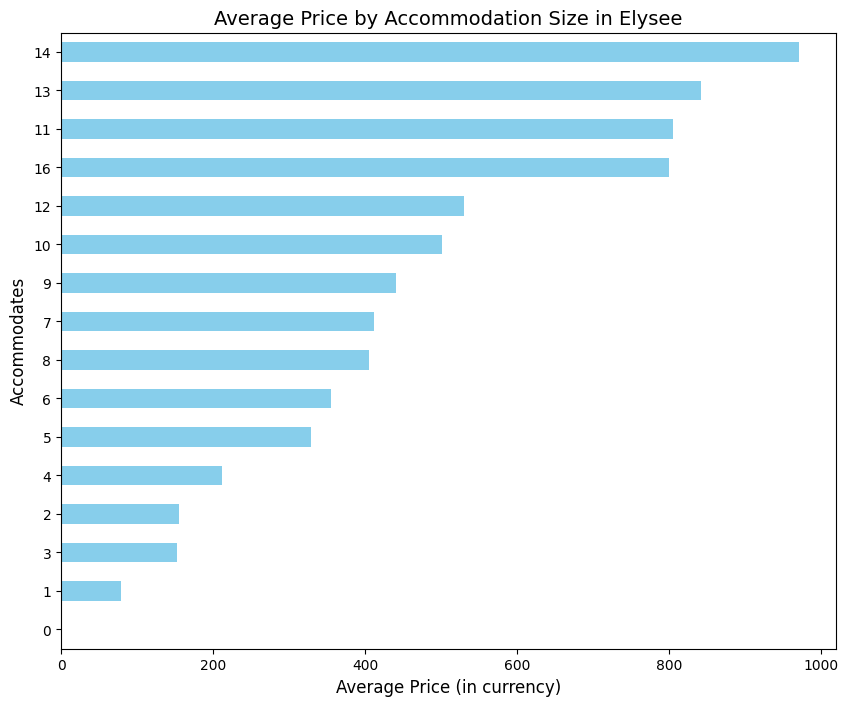

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming Listings_Paris is already defined and loaded
# Find the most expensive neighborhood
most_expensive_neighborhood = Listings_Paris.groupby('neighbourhood')['price'].mean().idxmax()

# Filter data for the most expensive neighborhood
most_expensive_data = Listings_Paris[Listings_Paris['neighbourhood'] == most_expensive_neighborhood]

# Group by 'accommodates' and calculate the average price
average_price_by_accommodates = most_expensive_data.groupby('accommodates')['price'].mean().sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
ax = average_price_by_accommodates.plot(kind='barh', color='skyblue')

# Add a title and axis labels
plt.title(f'Average Price by Accommodation Size in {most_expensive_neighborhood}', fontsize=14)
plt.xlabel('Average Price (in currency)', fontsize=12)
plt.ylabel('Accommodates', fontsize=12)

# Ensure that accommodates numbers appear as labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Keeps labels horizontal

# Show the plot
plt.show()


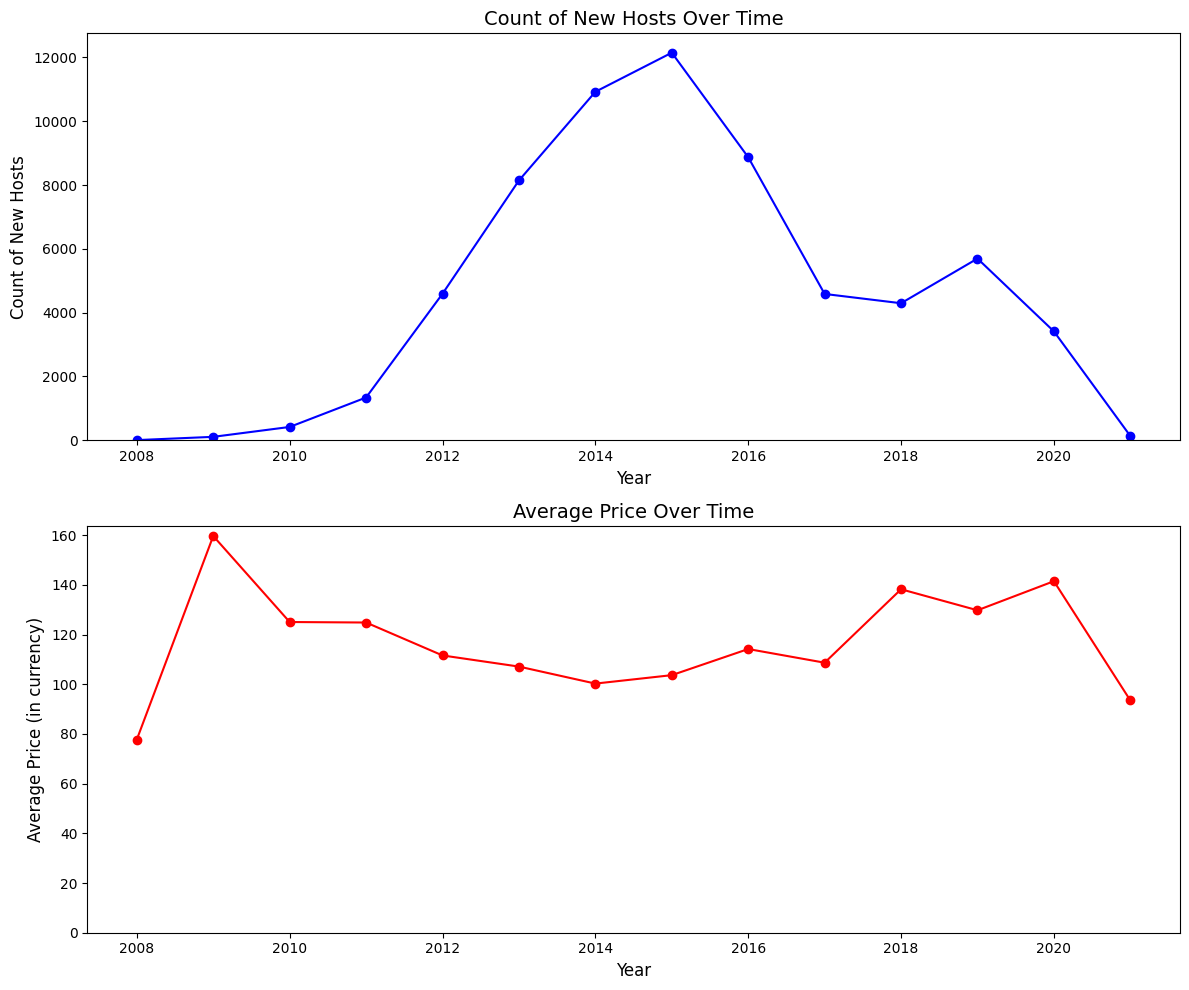

In [29]:



# Plotting the data from paris_listings_over_time

# Create a figure and axes for two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the count of new hosts over time
ax1.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['new_hosts_count'], marker='o', linestyle='-', color='b')
ax1.set_title('Count of New Hosts Over Time', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Count of New Hosts', fontsize=12)
ax1.set_ylim(bottom=0)  # Set y-axis limit to start from 0

# Plot the average price over time
ax2.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], marker='o', linestyle='-', color='r')
ax2.set_title('Average Price Over Time', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Average Price (in currency)', fontsize=12)
ax2.set_ylim(bottom=0)  # Set y-axis limit to start from 0

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



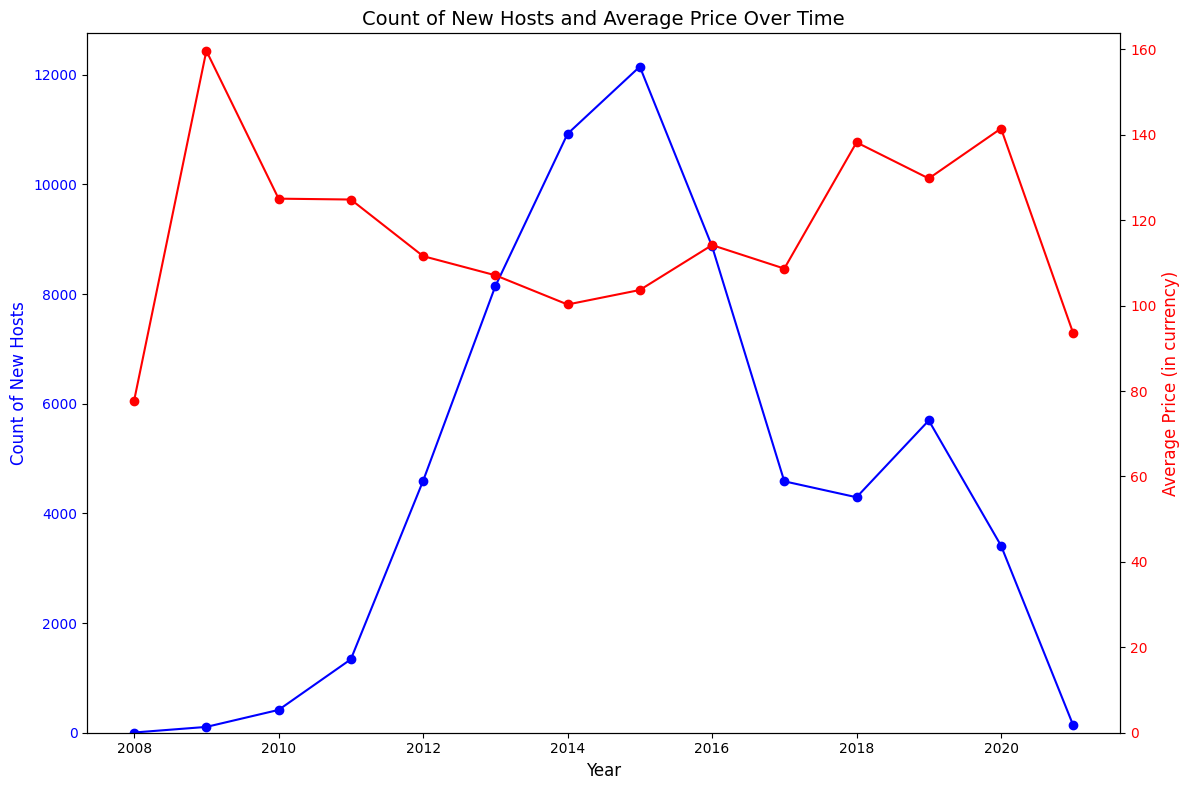

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming paris_listings_over_time is already defined and loaded
# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the count of new hosts on the primary y-axis
ax1.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['new_hosts_count'], marker='o', linestyle='-', color='b', label='New Hosts Count')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Count of New Hosts', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(bottom=0)  # Set y-axis limit to start from 0

# Create a secondary y-axis for the average price
ax2 = ax1.twinx()
ax2.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], marker='o', linestyle='-', color='r', label='Average Price')
ax2.set_ylabel('Average Price (in currency)', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(bottom=0)  # Set y-axis limit to start from 0

# Add titles and labels
plt.title('Count of New Hosts and Average Price Over Time', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
